# Detecção de falhas em placas de aço

Aluno: Ramon Fernandes Viana

Disciplina: ET-287

**Objetivo**: Implementar uma rede neural do tipo MLP capaz de classificar defeitos de fabricação em superfícies de placas de aço inoxidável. Tratar balanceamento de classes. Pré-processamento dos dados

## Bibliotecas utilizadas

In [1]:
!pip install ucimlrepo

In [2]:
!pip install ydata_profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 359.5/359.5 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 8.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 27.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 27.3 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=9a49b53ccc582546f6f29a8ca2bc73bae717cd99fd98f2f29319759ef2f94630
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [4]:
!pip install seaborn

In [5]:
from ucimlrepo import fetch_ucirepo
from ydata_profiling import ProfileReport
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import torch
import torch.nn as nn
import torch.optim as optim

## 1 - Base de dados

In [6]:
steelPlatesDataset = fetch_ucirepo(id=198)
matrixData = steelPlatesDataset.data.features
targetData = steelPlatesDataset.data.targets

print(f"Dimensão matriz de dados: {matrixData.shape}\n")
print(f"Dimensão matriz de rótulos: {targetData.shape}")

Dimensão matriz de dados: (1941, 27)

Dimensão matriz de rótulos: (1941, 7)


## 2 - Análise exploratória de dados

In [7]:
class Analysis():
  def __init__(self, data):
    self.data = data

  def plotVariables(self, funcition):
      plot_functions = {
          "distplot": sns.distplot,
          "boxplot": sns.boxplot
      }
      plot_func = plot_functions.get(funcition)

      for variable in range(len(self.data.columns)):
        print(self.data.columns[variable])
        plot_func(self.data.iloc[:,variable])
        plt.show()


  def distributions(self):
      self.plotVariables("distplot")

  def boxplot(self):
    self.plotVariables("boxplot")



In [27]:
profile = ProfileReport(matrixData, title="Pandas Profiling Report")

In [28]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [30]:
profile.to_file("plates_data.html")

/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:363: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

X_Minimum


<ipython-input-7-d998c8316734>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plot_func(self.data.iloc[:,variable])


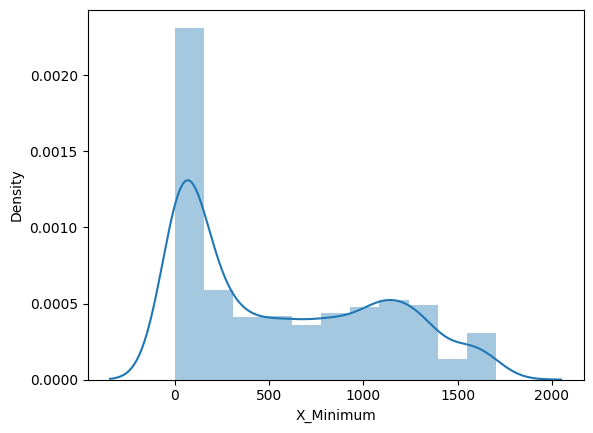

X_Maximum


<ipython-input-7-d998c8316734>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plot_func(self.data.iloc[:,variable])


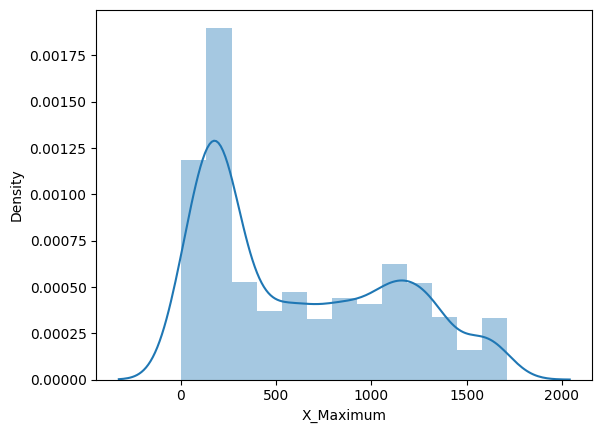

Y_Minimum


<ipython-input-7-d998c8316734>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plot_func(self.data.iloc[:,variable])


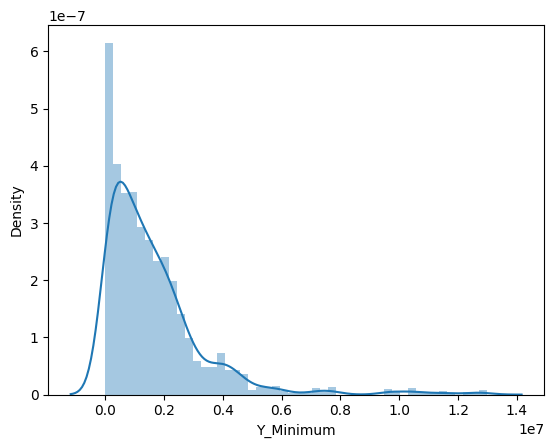

Y_Maximum


<ipython-input-7-d998c8316734>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plot_func(self.data.iloc[:,variable])


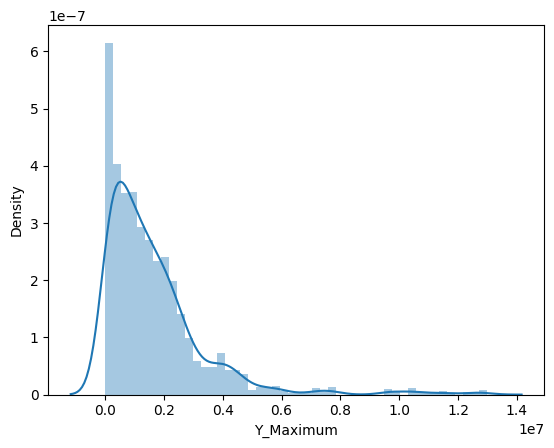

Pixels_Areas


<ipython-input-7-d998c8316734>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plot_func(self.data.iloc[:,variable])


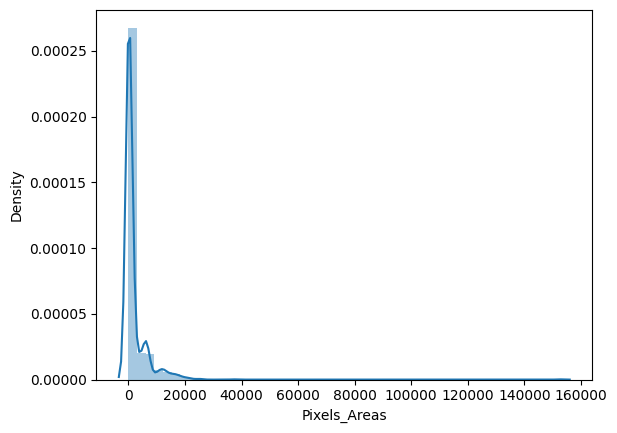

X_Perimeter


<ipython-input-7-d998c8316734>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plot_func(self.data.iloc[:,variable])


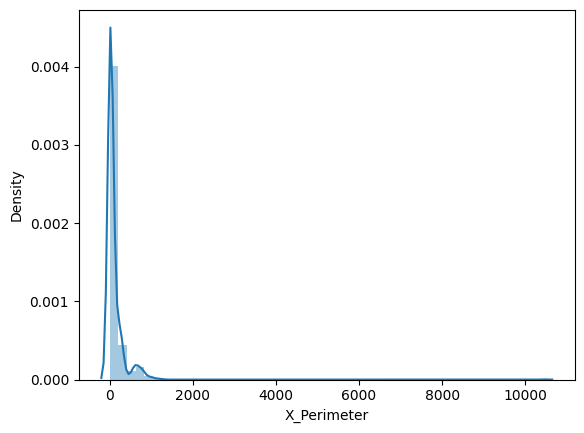

Y_Perimeter


<ipython-input-7-d998c8316734>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plot_func(self.data.iloc[:,variable])


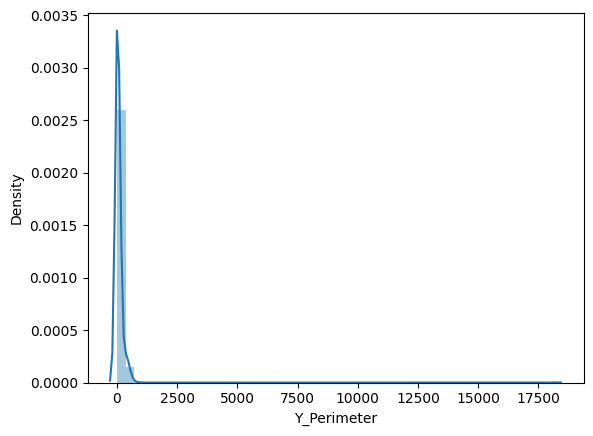

Sum_of_Luminosity


<ipython-input-7-d998c8316734>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plot_func(self.data.iloc[:,variable])


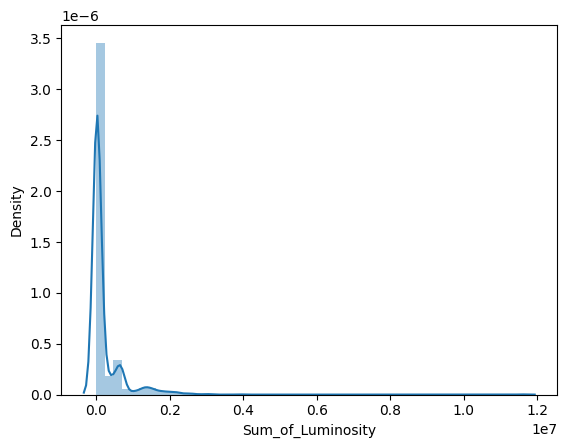

Maximum_of_Luminosity


<ipython-input-7-d998c8316734>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plot_func(self.data.iloc[:,variable])


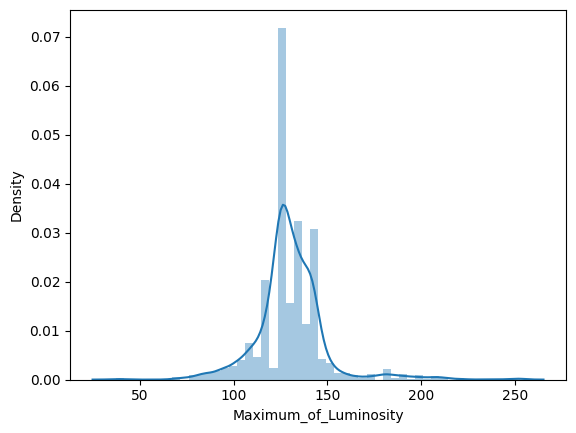

Length_of_Conveyer


<ipython-input-7-d998c8316734>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plot_func(self.data.iloc[:,variable])


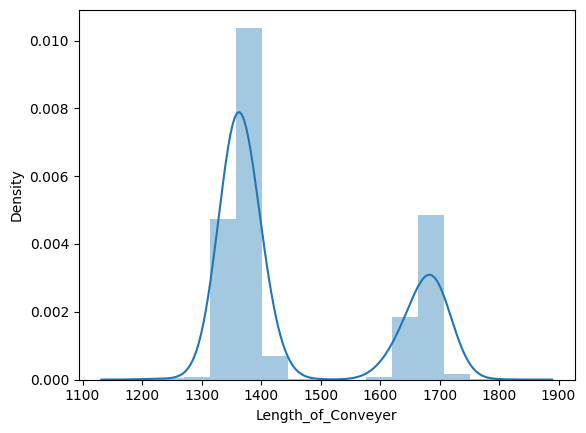

TypeOfSteel_A300


<ipython-input-7-d998c8316734>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plot_func(self.data.iloc[:,variable])


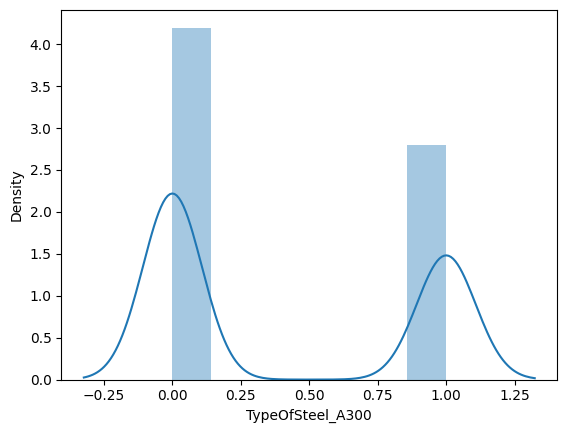

TypeOfSteel_A400


<ipython-input-7-d998c8316734>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plot_func(self.data.iloc[:,variable])


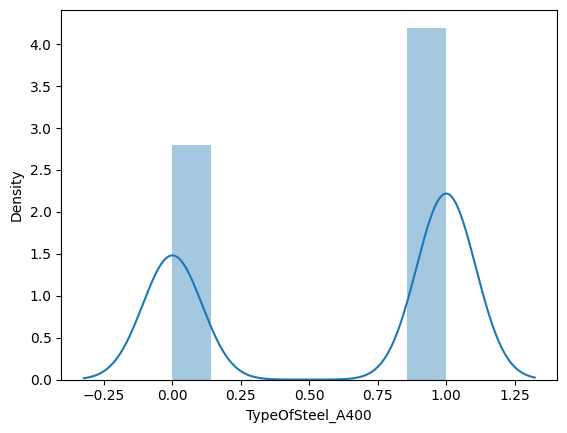

Steel_Plate_Thickness


<ipython-input-7-d998c8316734>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plot_func(self.data.iloc[:,variable])


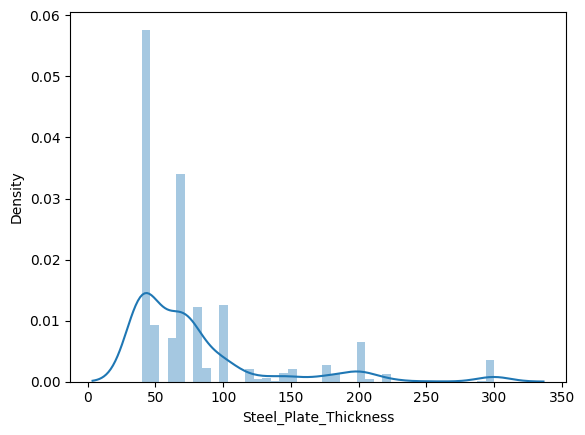

Edges_Index


<ipython-input-7-d998c8316734>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plot_func(self.data.iloc[:,variable])


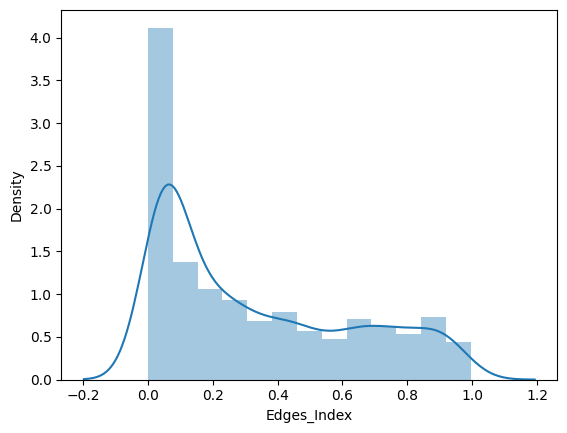

Empty_Index


<ipython-input-7-d998c8316734>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plot_func(self.data.iloc[:,variable])


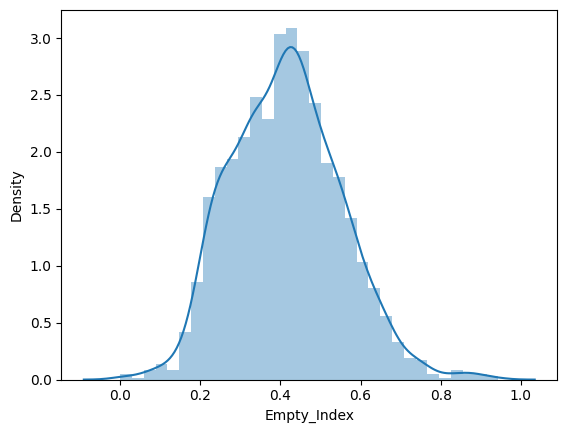

Square_Index


<ipython-input-7-d998c8316734>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plot_func(self.data.iloc[:,variable])


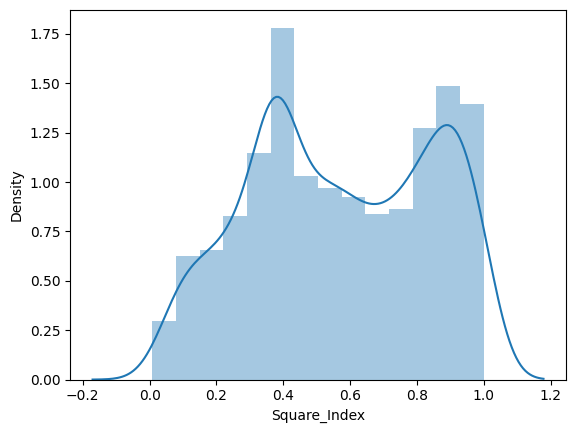

Outside_X_Index


<ipython-input-7-d998c8316734>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plot_func(self.data.iloc[:,variable])


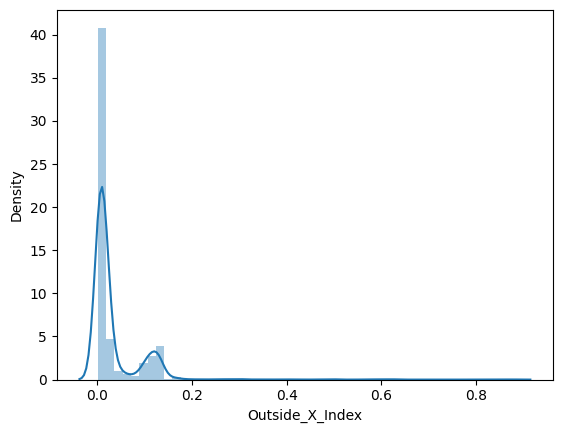

Edges_X_Index


<ipython-input-7-d998c8316734>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plot_func(self.data.iloc[:,variable])


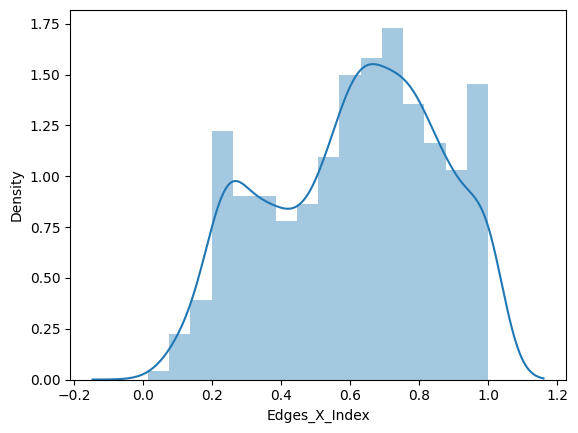

Edges_Y_Index


<ipython-input-7-d998c8316734>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plot_func(self.data.iloc[:,variable])


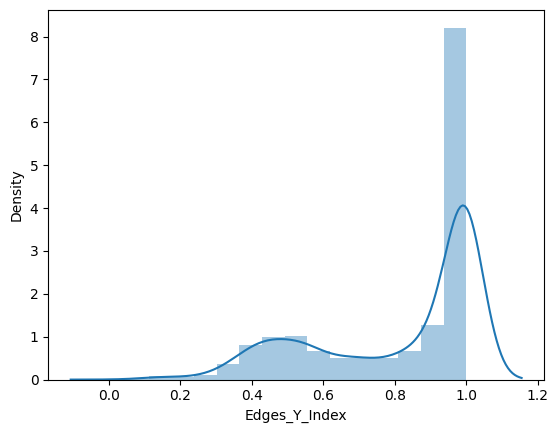

Outside_Global_Index


<ipython-input-7-d998c8316734>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plot_func(self.data.iloc[:,variable])


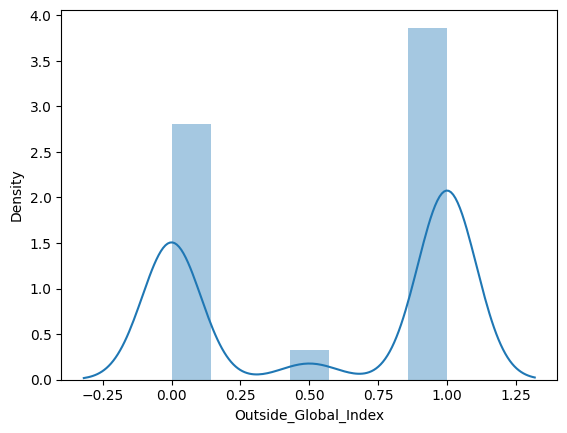

LogOfAreas


<ipython-input-7-d998c8316734>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plot_func(self.data.iloc[:,variable])


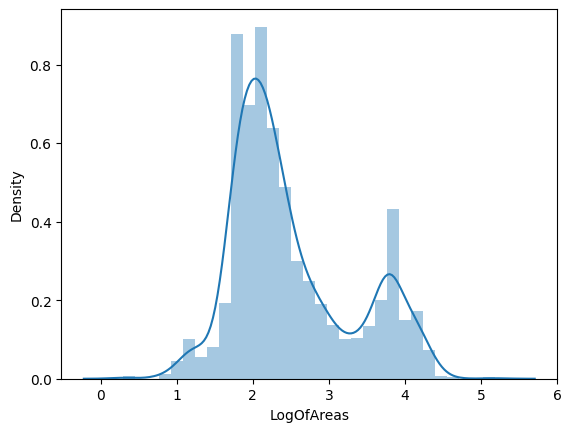

Log_X_Index


<ipython-input-7-d998c8316734>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plot_func(self.data.iloc[:,variable])


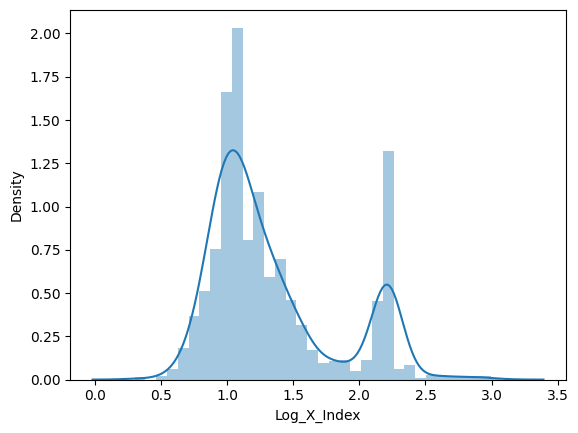

Log_Y_Index


<ipython-input-7-d998c8316734>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plot_func(self.data.iloc[:,variable])


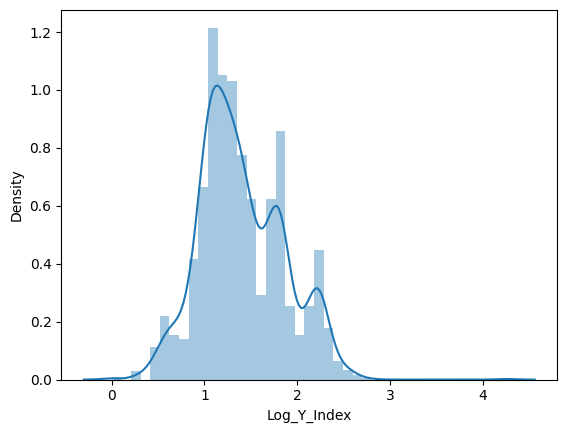

Orientation_Index


<ipython-input-7-d998c8316734>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plot_func(self.data.iloc[:,variable])


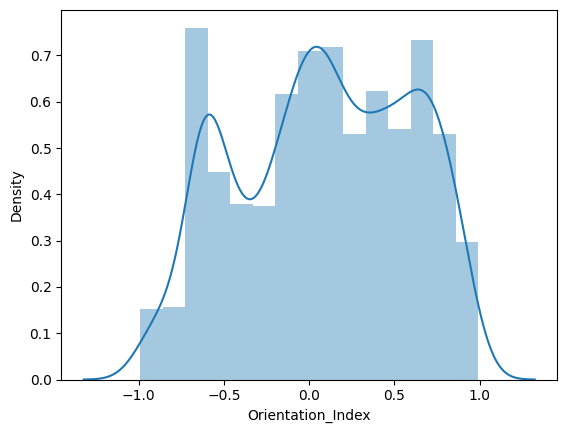

Luminosity_Index


<ipython-input-7-d998c8316734>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plot_func(self.data.iloc[:,variable])


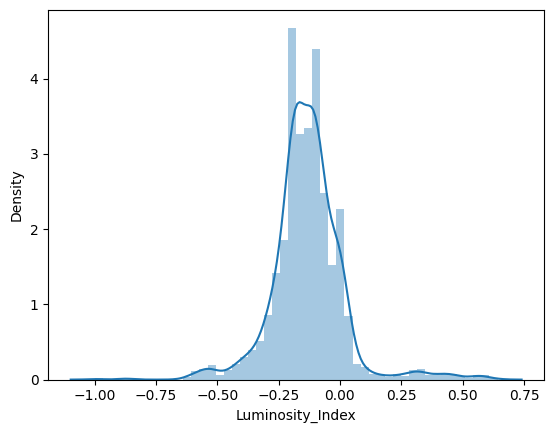

SigmoidOfAreas


<ipython-input-7-d998c8316734>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plot_func(self.data.iloc[:,variable])


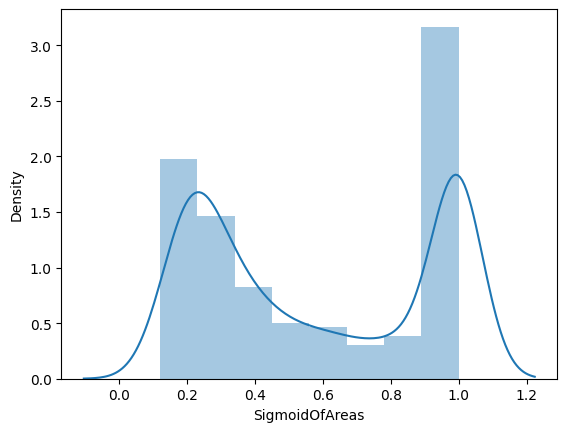

Minimum_of_Luminosity


<ipython-input-7-d998c8316734>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plot_func(self.data.iloc[:,variable])


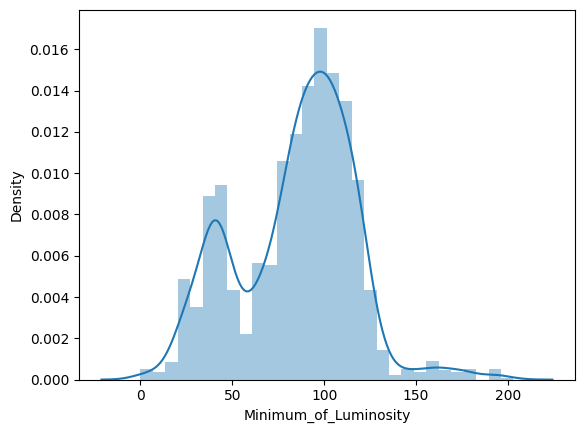

In [31]:
inputData = Analysis(matrixData)

inputData.distributions()

### Analise de outliers

In [ ]:
inputData.boxplot()

### Análise de balanceamento de classes

In [32]:
targetData.sum()

Pastry          158
Z_Scratch       190
K_Scratch       391
Stains           72
Dirtiness        55
Bumps           402
Other_Faults    673
dtype: int64

### Seleção de variáveis

In [33]:
targetData

,Pastry,Z_Scratch,K_Scratch,Stains,Dirtiness,Bumps,Other_Faults
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
1936,0,0,0,0,0,0,1
1937,0,0,0,0,0,0,1
1938,0,0,0,0,0,0,1
1939,0,0,0,0,0,0,1


In [ ]:
correlation_matrix = matrixData.corr().abs()
correlation_matrix

In [34]:
threshold = 0.8
toKeep = np.ones(correlation_matrix.shape[0], dtype=bool)

for i in range(correlation_matrix.shape[0]):
    for j in range(i+1, correlation_matrix.shape[0]):
        if correlation_matrix.iloc[i, j] > threshold:
            if toKeep[j]:
                toKeep[j] = False

selectedVariables = matrixData.columns[toKeep]
dataMatrixSelected = matrixData[selectedVariables]

print("Variáveis Selecionadas:")
print(selectedVariables)

Variáveis Selecionadas:
Index(['X_Minimum', 'Y_Minimum', 'Pixels_Areas', 'Maximum_of_Luminosity',
       'Length_of_Conveyer', 'TypeOfSteel_A300', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Minimum_of_Luminosity'],
      dtype='object')


In [ ]:
dataMatrixSelected

### 2.i - A base de dados é consistente?


Com base no arquivo plates_data.html e nas analises realizadas na celulas da seção 2. É possível concluir que os dados são consistentes. Não possuem valores e colunas duplicadas, não há dados faltantes, todas as variáveis de entrada possuem dados com o mesmo tipo para a respecitva coluna.
Para a realização de análises e utilização em modelos de aprendizado de máquina, as condições citadas são as requeridas para a utilização dos dados, o que consequentemente os tornam consistentes.

### 2.ii - Há dados faltantes?

Utilizando o arquivo de análise plates_data.html, é possível verificar que não há dados faltantes.

### 2.iii - Há dados não numéricos?

As variáveis de dados possuem apenas dados numéricos. Existem duas variáveis "TypeOfSteel_A300" e "TypeOfSteel_A400" que são categóricas, mas na base de dados possivelmente são convertidas, pois estão dispostas com valores 0 e 1.

### 2.iv - A base de dados é balanceada?

Não. A base possui classes desbanlanceadas e, pode ser verificado na cécula "Análise de balanceamento de classes".


### 2.v - Há necessidade de normalizar ou padronizar as variáveis de entrada?

Sim. Há necessidade de normalizar os dados. As variáveis utilizadas possuem grandezas e escalas diferentes e, por não admitirem distribuição normal para todas as variáveis, convém normalizar a entrada, para um melhor desempenho do modelo.

### 2.vi - Analise o heatmap das variáveis e proponha uma estratégia para reduzir as variáveis de entrada sem perda de informação útil.

Analisando o heatmap que pode ser visualizado no arquivo plates_data.html e nos valores de correlação calculados na seção "Seleção de variáveis", foi proposto o método de seleção baseado na correlação, utilizando um threshold de 0.8.

## 3: Split dos dados de entrada

In [ ]:
scaler = MinMaxScaler()
dataMatrixNormalized = scaler.fit_transform(matrixData)

In [ ]:
xTrain, xTest, yTrain, yTest = train_test_split(dataMatrixNormalized,targetData, test_size=0.3, random_state=42)

print(xTrain.shape)
print(xTest.shape)
print(yTrain.shape)
print(yTest .shape)

## 4: Implementação MLP

In [ ]:
class MLP(nn.Module):
  def __init__(self, inputDim, hiddenDim, outputDim):
    super(MLP, self).__init__()
    self.fc1 = nn.Linear(inputDim, hiddenDim)
    self.fc2 = nn.Linear(hiddenDim, outputDim)
    self.relu = nn.ReLU()
    self.sigmoid = nn.Sigmoid()
    self.outputDim = outputDim

  def forward(self, input):
    input = self.relu(self.fc1(input))
    input = self.sigmoid(self.fc2(input))
    return input

  def trainModel(self, xTrain, yTrain, numEpochs, learningRate):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(self.parameters(), lr = learningRate)

    for epoch in range(numEpochs):
            self.train()
            optimizer.zero_grad()
            outputs = self.forward(xTrain)
            loss = criterion(outputs, yTrain)
            loss.backward()
            optimizer.step()
            if (epoch+1) % 10 == 0:
                print(f'Epoch [{epoch+1}/{numEpochs}], Loss: {loss.item():.4f}')

  def evaluateModel(self, X_test, y_test):
    self.eval()
    with torch.no_grad():
        outputs = self.forward(X_test)
        _, predicted = torch.max(outputs, 1)
        _, y_test_index = torch.max(y_test, 1)

        confusion_matrix = np.zeros((self.outputDim, self.outputDim), dtype=int)
        for i in range(len(y_test_index)):
            confusion_matrix[y_test_index[i], predicted[i]] += 1

        for i in range(self.outputDim):
            true_positive = confusion_matrix[i, i]
            false_positive = sum(confusion_matrix[:, i]) - true_positive
            false_negative = sum(confusion_matrix[i, :]) - true_positive

            precision = true_positive / (true_positive + false_positive + 1e-10)
            recall = true_positive / (true_positive + false_negative + 1e-10)
            f1_score = 2 * (precision * recall) / (precision + recall + 1e-10)

            print(f'Class {i}: Precision={precision:.4f}, Recall={recall:.4f}, F1-Score={f1_score:.4f}')

        accuracy = (predicted == y_test_index).float().mean()
        print(f'Accuracy on test set: {accuracy.item() * 100:.2f}%')
        print('Confusion Matrix:')
        print(confusion_matrix)


In [ ]:
print(xTrain.shape)
print(xTest.shape)
print(yTrain.shape)
print(yTest .shape)

### Treino MLP

In [ ]:
xTrainTensor = torch.tensor(xTrain, dtype=torch.float32)
yTrainTensor = torch.tensor(yTrain.values, dtype=torch.float32)
xTestTensor = torch.tensor(xTest, dtype=torch.float32)
ytestTensor = torch.tensor(yTest.values, dtype=torch.float32)

In [ ]:
input_dim = xTrainTensor .shape[1]
hidden_dim = 128
output_dim = yTrainTensor.shape[1]

In [ ]:
model = MLP(input_dim, hidden_dim, output_dim)

In [25]:
model.trainModel(xTrainTensor, yTrainTensor, 1000, 0.1)

Epoch [10/1000], Loss: 1.4520
Epoch [20/1000], Loss: 1.4348
Epoch [30/1000], Loss: 1.4273
Epoch [40/1000], Loss: 1.4272
Epoch [50/1000], Loss: 1.4260
Epoch [60/1000], Loss: 1.4255
Epoch [70/1000], Loss: 1.4229
Epoch [80/1000], Loss: 1.4224
Epoch [90/1000], Loss: 1.4208
Epoch [100/1000], Loss: 1.4204
Epoch [110/1000], Loss: 1.4202
Epoch [120/1000], Loss: 1.4200
Epoch [130/1000], Loss: 1.4199
Epoch [140/1000], Loss: 1.4198
Epoch [150/1000], Loss: 1.4197
Epoch [160/1000], Loss: 1.4197
Epoch [170/1000], Loss: 1.4191
Epoch [180/1000], Loss: 1.4191
Epoch [190/1000], Loss: 1.4190
Epoch [200/1000], Loss: 1.4190
Epoch [210/1000], Loss: 1.4189
Epoch [220/1000], Loss: 1.4189
Epoch [230/1000], Loss: 1.4188
Epoch [240/1000], Loss: 1.4186
Epoch [250/1000], Loss: 1.4185
Epoch [260/1000], Loss: 1.4185
Epoch [270/1000], Loss: 1.4184
Epoch [280/1000], Loss: 1.4184
Epoch [290/1000], Loss: 1.4184
Epoch [300/1000], Loss: 1.4184
Epoch [310/1000], Loss: 1.4183
Epoch [320/1000], Loss: 1.4183
Epoch [330/1000],

### MLP Teste

In [26]:
model.evaluateModel(xTestTensor, ytestTensor)

Class 0: Precision=0.5217, Recall=0.3243, F1-Score=0.4000
Class 1: Precision=0.9038, Recall=0.7460, F1-Score=0.8174
Class 2: Precision=0.9804, Recall=0.8333, F1-Score=0.9009
Class 3: Precision=0.0000, Recall=0.0000, F1-Score=0.0000
Class 4: Precision=0.0000, Recall=0.0000, F1-Score=0.0000
Class 5: Precision=0.5769, Recall=0.5455, F1-Score=0.5607
Class 6: Precision=0.5464, Recall=0.7674, F1-Score=0.6383
Accuracy on test set: 65.87%
Confusion Matrix:
[[ 12   0   0   0   0   4  21]
 [  0  47   1   0   0   1  14]
 [  0   0 100   0   0   0  20]
 [  0   0   0   0   0   1  22]
 [  1   0   0   0   0   1  13]
 [  1   2   0   0   0  60  47]
 [  9   3   1   0   0  37 165]]


## 5: Resultados

### 5.i - Como a complexidade do modelo impacta no desempenho?

Um modelo muito simples (poucos neurônios, camadas, falta de não linearidades...) pode conferir ao sistema um underfiting.
Capacidade de generalização, modelos muito complexos podem capturar padrões muito específico nos dados, de forma que não seja possível replicar em novos dados.
Tempo de treinamento, modelos mais complexos levam mais tempo para treinar, geralmente pela quantidade de parametros e número de épocas. Esses fatores podem agregar muito valor ao desempenho final do modelo.
Tratamento de desbalanceamento, um dos fatores mais importantes no depempenho final. Modelos mais complexos possuem tratamento de desbalanceamento, conferindo um depempenho maior e, sendo mais complexo o desenvolvimento.

### 5.ii - Comente sobre a estratégia de ajuste de hiper parâmetros adotada para ajustar o modelo.

O código usa o otimizador Adam com uma taxa de aprendizado ajustável manualmente.
O número de épocas define quantas vezes o conjunto de treinamento completo será passado pelo modelo durante o treinamento. O código especifica um número de épocas para treinar o modelo. O número ideal de épocas pode variar dependendo da complexidade do problema e da arquitetura do modelo.
O código usa a função de perda de entropia cruzada (CrossEntropyLoss), que é comumente usada em problemas de classificação multiclasse.
No modelo proposto a arquitetura utiliza duas camadas, usada com ativações ReLU e Sigmoid.
 Durante o treinamento, o código monitora a perda do modelo em cada época e imprime o valor da perda a cada 10 épocas. Isso permite acompanhar o progresso do treinamento e verificar se a perda está diminuindo, o que indica que o modelo está aprendendo efetivamente.

### 5.iii - Como a quantidade de amostras de cada classe pode influenciar no desempenho da rede neural?



*   Se uma ou mais classes tiverem significativamente menos amostras do que outras, isso pode levar a um desbalanceamento de classes.  Isso pode resultar em modelos com desempenho inferior para as classes menos representadas. O evaluate considerando o desempenho por classe representa bem o impacto gerado pelo desbalanceamento.
*   Classes marjoritárias podem gerar viés ao modelo. Isso significa que o modelo pode classificar erroneamente a maioria das instâncias como pertencentes à classe majoritária, ignorando as classes minoritárias.
* Se uma classe tem muito poucas amostras, o modelo pode acabar memorizando essas amostras em vez de aprender padrões gerais que se aplicam a todas as classes.




### 5.iv - Quais variáveis de entrada são mais relevantes para o problema?

Com base na correlação, as variáveis que são mais relevantes para o sistema, considerando um threshold de 0.8, são:

['X_Minimum', 'Y_Minimum', 'Pixels_Areas', 'Maximum_of_Luminosity',
       'Length_of_Conveyer', 'TypeOfSteel_A300', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Minimum_of_Luminosity']